In [1]:
import torch
from torch import nn
import torchvision
import numpy as np
import pandas as pd
import os

import skimage
import matplotlib.pyplot as plt
import seaborn as sb
from PIL import Image

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device


device(type='cpu')

In [2]:
df = pd.read_csv('labels_train.csv')
df

,file_name,class_id
0,img_4358977458434011046.jpg,1
1,img_5224016757187192130.jpg,2
2,img_3065202206106254707.jpg,2
3,img_6304894865561547174.jpg,1
4,img_3371338542810939877.jpg,2
...,...,...
4667,img_6661311872293090412.jpg,2
4668,img_3844568579349757418.jpg,1
4669,img_9145812369383814369.jpg,1
4670,img_1311393330250392648.jpg,1


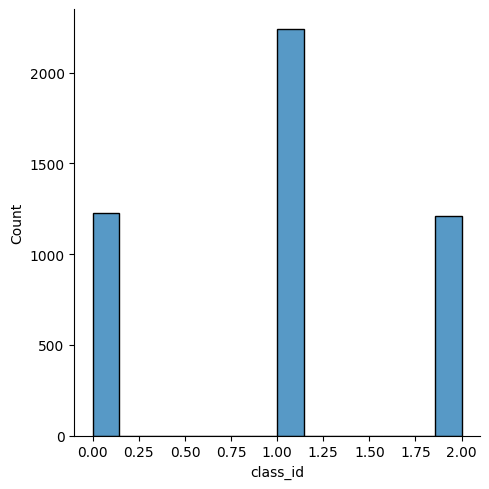

In [3]:
sb.displot(df['class_id'])

In [4]:
# sizes of each class
classes = df['class_id'].unique()
total_images = df.shape[0]
class_weights = {}
class_frequencies = []

for c in classes:
    class_weights[c] = df['class_id'].value_counts().get(c, 0)
    class_frequencies.append(class_weights[c]/total_images)
    class_weights[c] = class_weights[c]/total_images

class_median = np.median(class_frequencies)

for c in class_weights:
    class_weights[c] = class_median/class_weights[c]
    print(f"{c} : {class_weights[c]}")

1 : 0.5482573726541554
2 : 1.0165700082850042
0 : 1.0


In [ ]:
import os
import shutil

disease_types = df['class_id'].unique()
for type in disease_types:
    if type == 0:
        folder_name = 'no_pneumonia'
    elif type == 1:
        folder_name = 'bacterial_pneumonia'
    else:
        folder_name = 'viral_pneumonia'

    if not os.path.exists(folder_name):
        os.makedirs(folder_name)
    else:
        print("already exisits")

#each image from the HAM10000_1 and check against the metadata

for filename in os.listdir('train_images/train_images'): 
    image = df.loc[df['file_name'] == filename]
    img_class = image['class_id'].values[0]
    src = 'train_images/train_images/' + filename
    
    if img_class == 0:
        folder = "no_pneumonia"
    elif img_class == 1:
        folder = "bacterial_pneumonia"
    else:
        folder = "viral_pneumonia"

    dest = folder + '/' + filename
    shutil.copy(src, dest)


print("Done!")

already exisits
already exisits
already exisits
3686    1
Name: class_id, dtype: int64
1496    1
Name: class_id, dtype: int64
2990    0
Name: class_id, dtype: int64
591    2
Name: class_id, dtype: int64
4420    1
Name: class_id, dtype: int64
157    1
Name: class_id, dtype: int64
4627    1
Name: class_id, dtype: int64
3368    1
Name: class_id, dtype: int64
4136    1
Name: class_id, dtype: int64
1575    1
Name: class_id, dtype: int64
3192    1
Name: class_id, dtype: int64
1363    2
Name: class_id, dtype: int64
4412    1
Name: class_id, dtype: int64
382    1
Name: class_id, dtype: int64
2910    1
Name: class_id, dtype: int64
3598    2
Name: class_id, dtype: int64
1108    2
Name: class_id, dtype: int64
2491    1
Name: class_id, dtype: int64
3229    1
Name: class_id, dtype: int64
1198    1
Name: class_id, dtype: int64
3826    0
Name: class_id, dtype: int64
4565    1
Name: class_id, dtype: int64
1248    1
Name: class_id, dtype: int64
4452    1
Name: class_id, dtype: int64
675    2
Name: clas

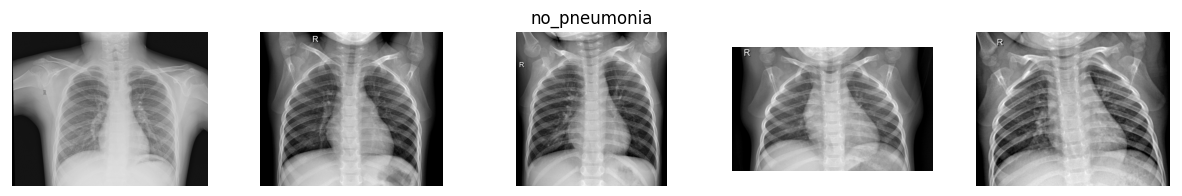

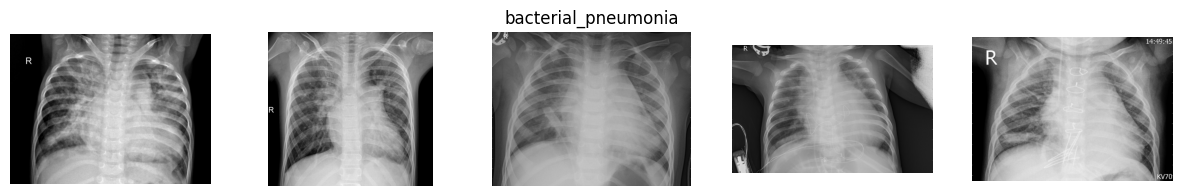

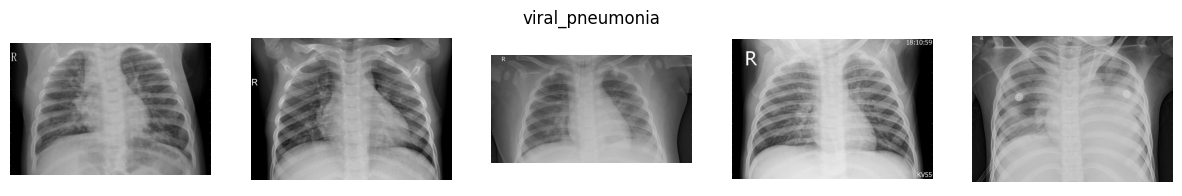

In [36]:
label = ['0', '1', '2']
label_images = []
classes = ['no_pneumonia', 'bacterial_pneumonia', 'viral_pneumonia']

for index, label in enumerate(classes):
    plt.figure(figsize=(15,2))
    plt.title(classes[index])
    plt.axis('off')

    for i in range(5):
        img = plt.imread(label+ '/' +os.listdir(label)[i])
        plt.subplot(1, 5, i +1)
        plt.axis('off')
        plt.imshow(img, cmap="gray")
    
    plt.show()